<a href="https://colab.research.google.com/github/aleszcz/Aleks_portfolio/blob/main/SHAP_with_Abalonedata_and_Predicting_age_number_of_rings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install shap


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 9.6 MB/s eta 0:00:00


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import xgboost as xgb
import shap

# Initialize JavaScript visualization for shap
shap.initjs()


In [6]:
pip install ucimlrepo


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import xgboost as xgb
import shap

# Initialize JavaScript visualization for shap
shap.initjs()

# Fetch dataset from ucimlrepo
from ucimlrepo import fetch_ucirepo

# Fetch the Abalone dataset
abalone = fetch_ucirepo(id=1)

# Data (as pandas dataframes)
X = abalone.data.features
y = abalone.data.targets

# Print metadata
print("Metadata:")
print(abalone.metadata)

# Print variable information
print("\nVariable Information:")
print(abalone.variables)

# Display the first few rows of the dataset
print("\nFeatures (X):")
print(X.head())

print("\nTargets (y):")
print(y.head())


Metadata:
{'uci_id': 1, 'name': 'Abalone', 'repository_url': 'https://archive.ics.uci.edu/dataset/1/abalone', 'data_url': 'https://archive.ics.uci.edu/static/public/1/data.csv', 'abstract': 'Predict the age of abalone from physical measurements', 'area': 'Biology', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Tabular'], 'num_instances': 4177, 'num_features': 8, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['Rings'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C55C7W', 'creators': ['Warwick Nash', 'Tracy Sellers', 'Simon Talbot', 'Andrew Cawthorn', 'Wes Ford'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a micr

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import xgboost as xgb
import shap

# Initialize JavaScript visualization for shap
shap.initjs()

# Fetch dataset from ucimlrepo
from ucimlrepo import fetch_ucirepo

# Fetch the Abalone dataset
abalone = fetch_ucirepo(id=1)

# Data (as pandas dataframes)
X = abalone.data.features
y = abalone.data.targets

# Combine features and targets into a single DataFrame
data = pd.concat([X, y], axis=1)

# Save the dataset to a CSV file
data.to_csv('abalone_dataset.csv', index=False)

print("Dataset saved as 'abalone_dataset.csv'")


Dataset saved as 'abalone_dataset.csv'


In [9]:
# Read the dataset from the CSV file
data = pd.read_csv('abalone_dataset.csv')

# Print the headers (column names)
print("Headers:")
print(data.columns.tolist())


Headers:
['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings']


In [13]:
data = pd.read_csv ('/content/abalone_dataset.csv')
print(len(data))
data.head()

4177


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


we  will start looking at one of the features and ispla  the scatterplot of the whole rings


Text(0.5, 1.0, 'Whole weight vs Rings')

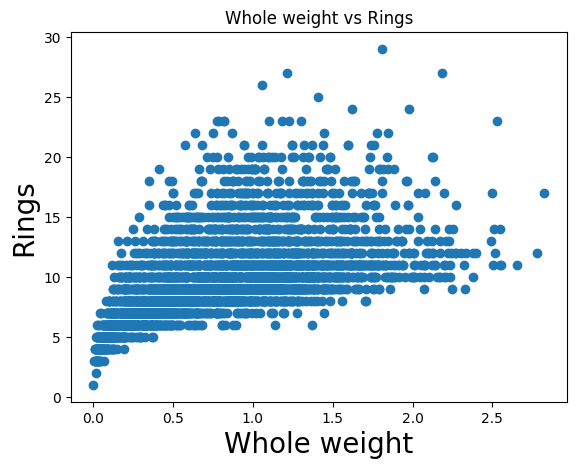

In [15]:
#plot whole weight data
plt.scatter(data['Whole_weight'], data['Rings'])
plt.xlabel('Whole weight', size =20)
plt.ylabel('Rings', size=20)
plt.title('Whole weight vs Rings')


Abalones weighing more with the rings increase =larger abalones

['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings']


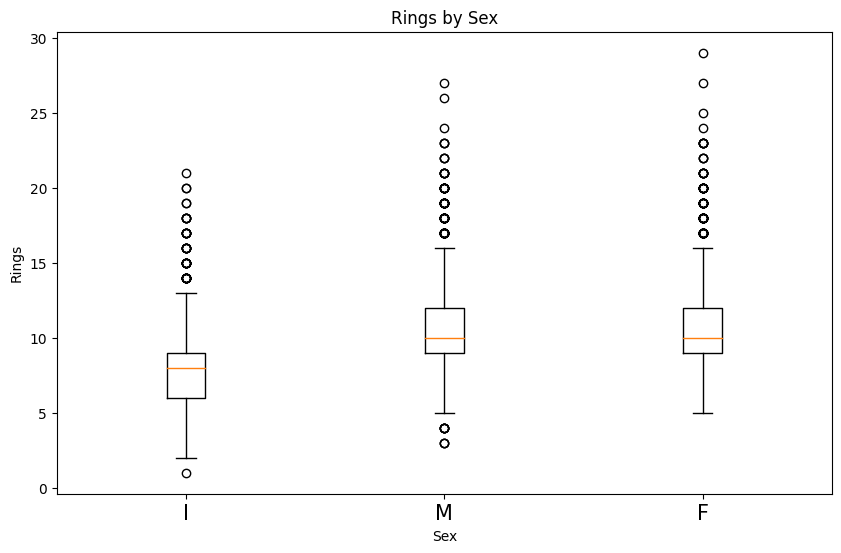

In [20]:
import matplotlib.pyplot as plt

# Check the column names to ensure correct naming
print(data.columns.tolist())

# Assuming 'sex' and 'rings' are the correct column names
plt.figure(figsize=(10, 6))

# Plot boxplots for 'rings' by 'sex'
plt.boxplot(data[data['Sex'] == 'I']['Rings'], positions=[1], labels=['I'])
plt.boxplot(data[data['Sex'] == 'M']['Rings'], positions=[2], labels=['M'])
plt.boxplot(data[data['Sex'] == 'F']['Rings'], positions=[3], labels=['F'])

# Set the x-ticks and labels
plt.xticks([1, 2, 3], ['I', 'M', 'F'], size=15)
plt.xlabel('Sex')
plt.ylabel('Rings')
plt.title('Rings by Sex')
plt.show()


correlation matrix

<Axes: >

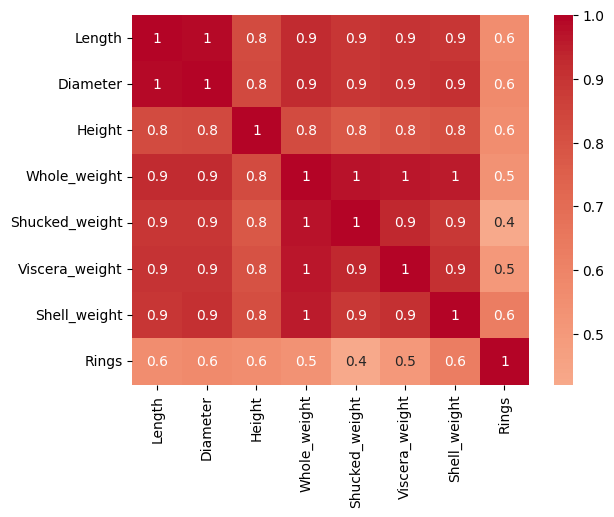

In [26]:
#ploting Correlation heatmap
cont= ['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings']

corr_matrix = pd.DataFrame(data[cont], columns=cont).corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center= 0, fmt='.1g')


Feature Engineering

In [31]:
y= data['Rings']
X= data[['Sex','Length','Diameter','Height','Whole_weight','Shucked_weight','Viscera_weight','Shell_weight']]

In [32]:
#create dummy farivble to drop categorical features and replace it
X['Sex.M']= [1 if x == 'M' else 0 for x in X['Sex']]
X['Sex.F']= [1 if x == 'F' else 0 for x in X['Sex']]
X['Sex.I']= [1 if x == 'I' else 0 for x in X['Sex']]
X= X.drop('Sex', axis=1)
X.head()


,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex.M,Sex.F,Sex.I
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,1,0,0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,1,0,0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,0,1,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,1,0,0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0,0,1


Modeling

In [34]:
#Train the  model
model= xgb.XGBRegressor(objective='reg:squarederror')
model.fit(X,y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Text(0, 0.5, 'Predicted Rings')

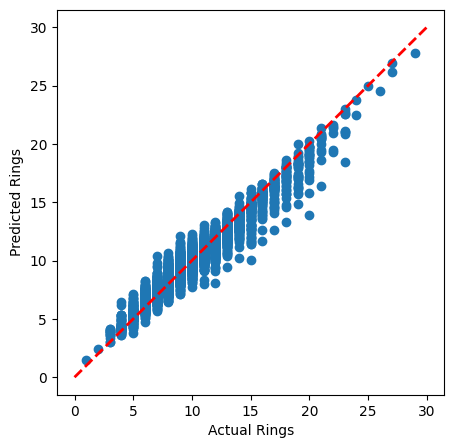

In [35]:
#evaliating
y_pred= model.predict(X)

#model evaluation
plt.figure(figsize=(5,5))
plt.scatter(y, y_pred)
plt.plot([0,30],
         [0, 30],
         color= 'red',
         linestyle= '--',
         linewidth= 2)

plt.xlabel('Actual Rings')
plt.ylabel('Predicted Rings')


Using SHAP model to tell us how it is making these predictions

In [36]:
explainer = shap.Explainer(model)
shap_values = explainer(X)

In [37]:
np.shape(shap_values.values)

(4177, 10)

Woterfall plot

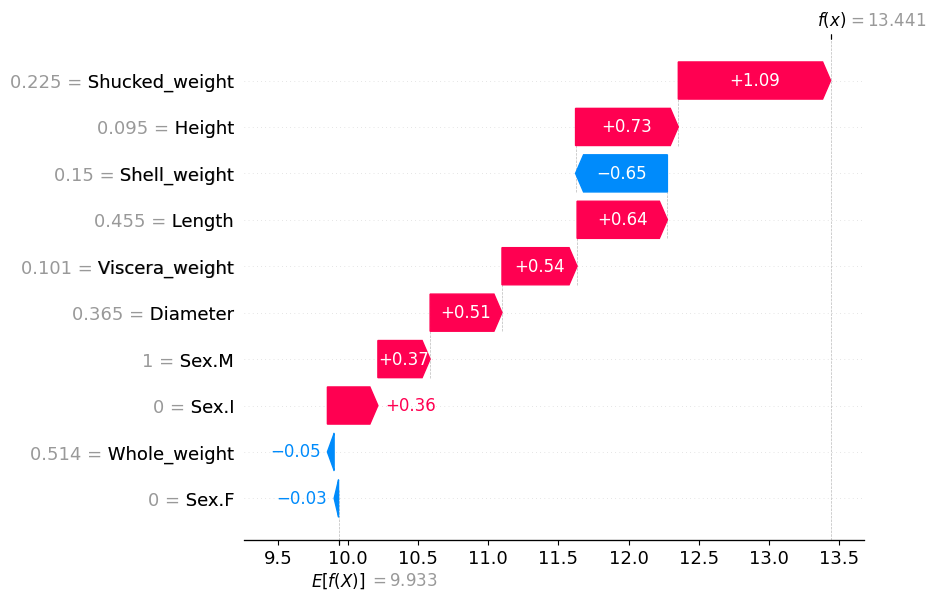

In [38]:
shap.plots.waterfall(shap_values[0])

E[f(x)] is the avg predicted number of rings across the all dataset, f(x) is predicted number of rings of htis abalone,

Shap values how each module feature contributed to the difference between the prediction and the avg prediction

In [40]:
import shap
shap.initjs()


In [43]:
shap.plots.force(shap_values[0:100])

Which features are important ot the model, metric for feature importance

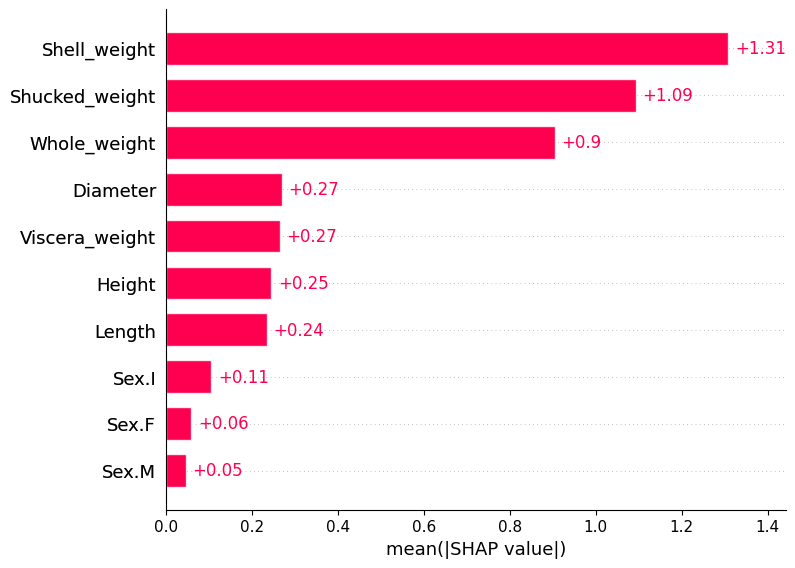

In [42]:
shap.plots.bar(shap_values)

Visualisation of all the shap values,
y is the values are groued by differen features
color of the poinst are the feature values

x is a shap values
highlits important relationship

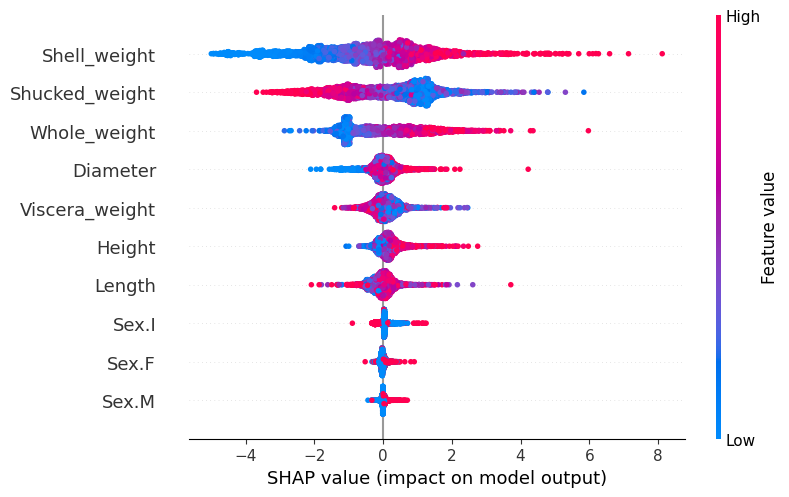

In [44]:
shap.plots.beeswarm(shap_values)

dependence plots for single feature if the feature hs none linear relationship

to color by the differneces dependences

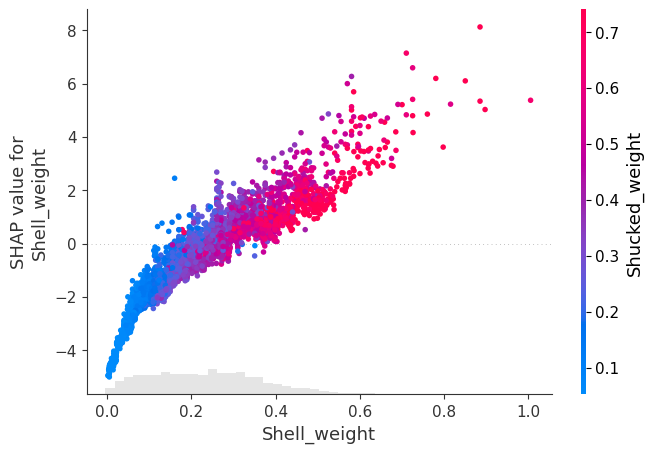

In [45]:
shap.plots.scatter(shap_values[:, 'Shell_weight'],
                   color= shap_values[:,"Shucked_weight"])

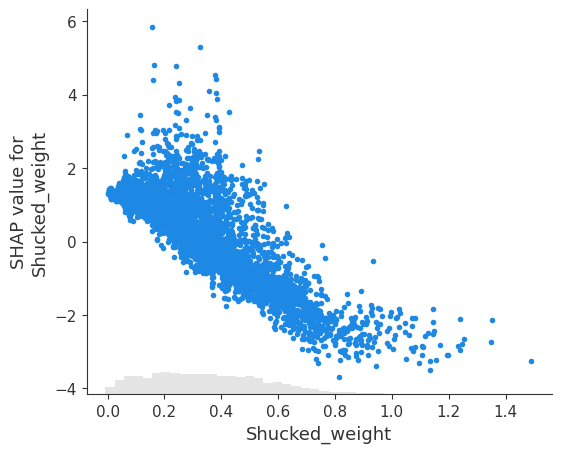

In [46]:
#confirming the beswax plot that shap values decresea while  the shucked weights increases\\
#result of the interaction
shap.plots.scatter(shap_values[:, 'Shucked_weight'])